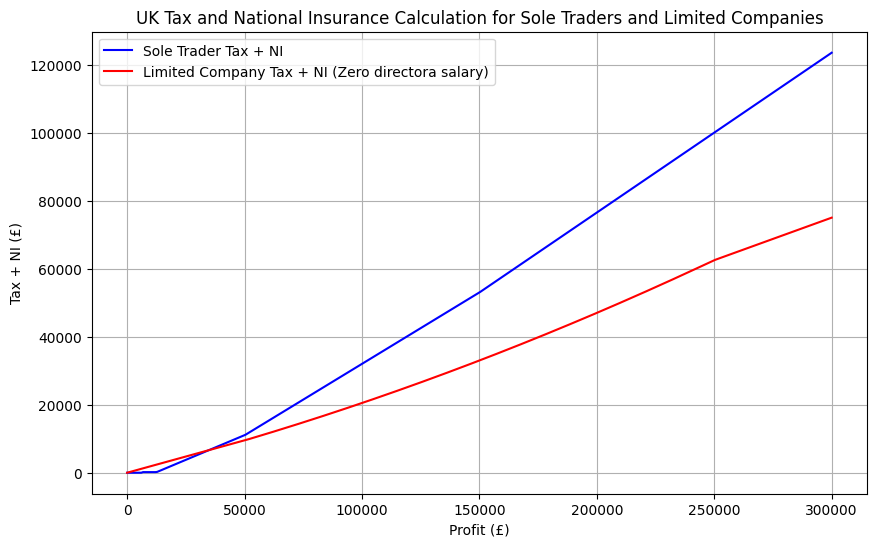

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Define tax and NI calculation functions
def sole_trader_tax_and_ni(income):
    personal_allowance = 12570
    basic_rate = 50270
    higher_rate = 150000
    ni_class_2 = 3.45 * 52  # Annual Class 2 NI
    ni_class_4_lower = 12570
    ni_class_4_upper = 50270

    # Income tax
    if income <= personal_allowance:
        income_tax = 0
    elif income <= basic_rate:
        income_tax = (income - personal_allowance) * 0.2
    elif income <= higher_rate:
        income_tax = (basic_rate - personal_allowance) * 0.2 + (income - basic_rate) * 0.4
    else:
        income_tax = (basic_rate - personal_allowance) * 0.2 + (higher_rate - basic_rate) * 0.4 + (income - higher_rate) * 0.45

    # NI Class 2
    if income > 6725:
        ni_class_2_contrib = ni_class_2
    else:
        ni_class_2_contrib = 0
    
    # NI Class 4
    if income <= ni_class_4_lower:
        ni_class_4_contrib = 0
    elif income <= ni_class_4_upper:
        ni_class_4_contrib = (income - ni_class_4_lower) * 0.09
    else:
        ni_class_4_contrib = (ni_class_4_upper - ni_class_4_lower) * 0.09 + (income - ni_class_4_upper) * 0.02

    return income_tax + ni_class_2_contrib + ni_class_4_contrib

def limited_company_tax_and_ni(profit, salary):
    small_profits_rate = 0.19
    main_rate = 0.25
    marginal_relief_lower = 50000
    marginal_relief_upper = 250000
    employer_ni_rate = 0.138
    employee_ni_rate = 0.12
    employee_ni_rate_upper = 0.02
    secondary_threshold = 9100
    primary_threshold = 12570

    # Corporation Tax
    if profit <= marginal_relief_lower:
        corp_tax = profit * small_profits_rate
    elif profit > marginal_relief_upper:
        corp_tax = profit * main_rate
    else:
        # Marginal Relief Calculation
        marginal_relief = ((marginal_relief_upper - profit) / (marginal_relief_upper - marginal_relief_lower)) * (main_rate - small_profits_rate) * profit
        corp_tax = (profit * main_rate) - marginal_relief

    # Employer NI
    if salary > secondary_threshold:
        employer_ni_contrib = (salary - secondary_threshold) * employer_ni_rate
    else:
        employer_ni_contrib = 0
    
    # Employee NI
    if salary <= primary_threshold:
        employee_ni_contrib = 0
    elif salary <= 50270:
        employee_ni_contrib = (salary - primary_threshold) * employee_ni_rate
    else:
        employee_ni_contrib = (50270 - primary_threshold) * employee_ni_rate + (salary - 50270) * employee_ni_rate_upper

    total_ni_contrib = employer_ni_contrib + employee_ni_contrib

    return corp_tax + total_ni_contrib

# Generate profit and salary range
profits = np.linspace(0, 300000, 400)
salary = 0  # Example salary for the director

# Calculate taxes and NI contributions
sole_trader_total = [sole_trader_tax_and_ni(income) for income in profits]
limited_company_total = [limited_company_tax_and_ni(profit, salary) for profit in profits]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(profits, sole_trader_total, label='Sole Trader Tax + NI', color='blue')
plt.plot(profits, limited_company_total, label='Limited Company Tax + NI (Zero directora salary)', color='red')
plt.xlabel('Profit (£)')
plt.ylabel('Tax + NI (£)')
plt.title('UK Tax and National Insurance Calculation for Sole Traders and Limited Companies')
plt.legend()
plt.grid(True)
plt.show()